In [74]:
import sys
import os
path = os.getcwd()
sys.path.insert(1, path[:-4])

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
import core.specializer as s
import numpy as np
from importlib import reload
import networkx as nx
import matplotlib.pyplot as plt
import time
import autograd.numpy as anp
import scipy.linalg as la

In [152]:
def doubling(x):
    return 2*x % 1

def lin1(x):
    return .2*x - .05

def lin2(x):
    return (1/3) * x + .2

def sig1(x):
    return anp.tanh(x)

def sig2(x):
    return 2*anp.tanh(x)

def iden(x):
    return x

def zero(x):
    return 0*x

In [185]:
reload(s)
A = np.array([
    [0,0,1,1],
    [1,0,1,1],
    [0,1,0,1],
    [0,1,1,0]
])

f = np.array([
    [zero,zero,lin2,lin1],
    [lin1,zero,lin2,lin1],
    [zero,lin2,zero,lin2],
    [zero,lin2,lin2,zero]
])

# a = np.array([sig1,sig1,sig1,sig1])
a = np.array([doubling,lin2,lin2,lin2])
labels = ['1','2','3','4']
G = s.DirectedGraph(A, (a,f), labels=labels)

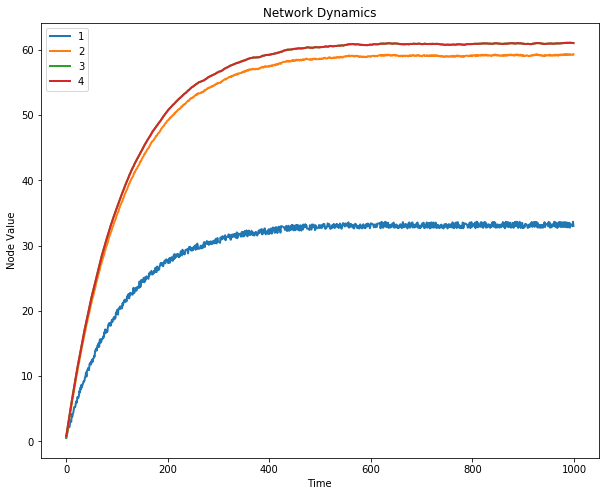

In [186]:
plt.figure(figsize=(10,8))
k = G.iterate(1000,np.random.random(G.n),graph=True)

<Figure size 720x576 with 0 Axes>

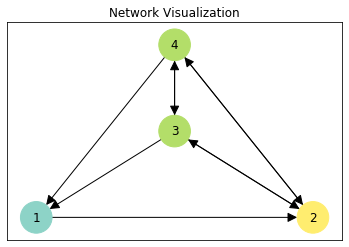

In [187]:
# G.coloring()
# print(G.colors)
plt.figure(figsize=(10,8))
G.network_vis(use_eqp=True)

<Figure size 720x576 with 0 Axes>

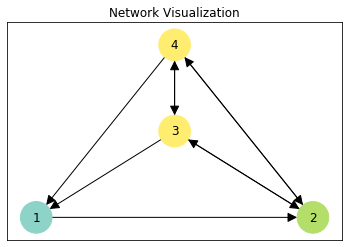

In [188]:
plt.figure(figsize=(10,8))
G.network_vis()

In [189]:
df = G.stability_matrix()[1:,1:]
print(df)

[[0.33333333 0.33333333 0.2       ]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


In [190]:
# for i in range(5):
#     base = np.random.choice(G.indices, int(G.n*0.9), replace=False)
#     G.specialize(base)
# G.coloring()
# i = G.iterate(30, np.random.random(G.n), graph=True)
eigs = la.eig(df)
rad = np.max(np.abs(eigs[0]))
print(rad)
print(G.spectral_radius())

0.9533823502911817
2.0169665086206416


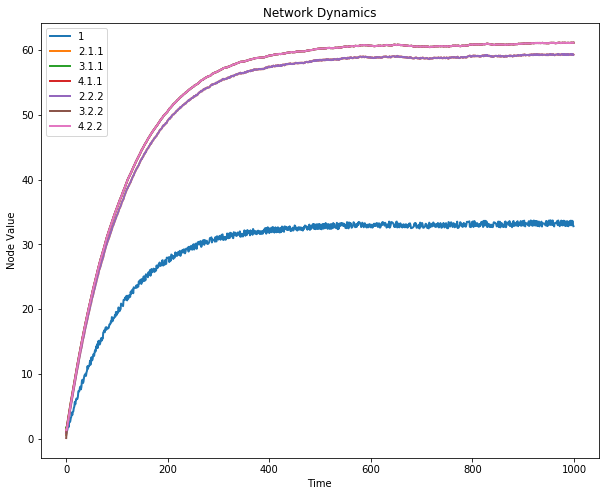

In [192]:
base = ['1']
G.specialize(base)
plt.figure(figsize=(10,8))
k = G.iterate(1000,np.random.random(G.n)*2, graph=True)

{0: array([0]), 1: array([2, 3, 5, 6]), 2: array([1, 4])}


<Figure size 720x576 with 0 Axes>

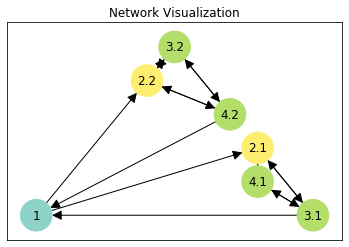

In [184]:
G.coloring()
print(G.colors)
plt.figure(figsize=(10,8))
G.network_vis(use_eqp=True)